In [1]:
# CB: This notebook attempts to replicate previous results concerning batch normalization before and after relu layers.
# CB: I have simplified and modified some of the steps and code that were present in the Udacity notebook.

In [2]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
# CB: Load the dataset.  Make sure to be in proper directory.

tform = transforms.ToTensor()

mnist_train_data = datasets.MNIST(root='data', train=True, transform = tform)
mnist_test_data = datasets.MNIST(root='data', train=False, transform = tform)

In [4]:
# CB: Look at the format of an example of the data.  We want to visualize a two dimensional image.
# CB: First index mnist_train_data[0] still has a label (e.g. digit).
# CB: Second index mnist_train_data[0][0].shape has no label, but returns a (1, 28, 28) in shape.
mnist_train_data[0][0][0].shape

torch.Size([28, 28])

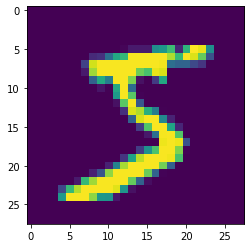

In [5]:
# CB: Multi-level indexing required to visualize data.
plt.imshow(mnist_train_data[0][0][0])

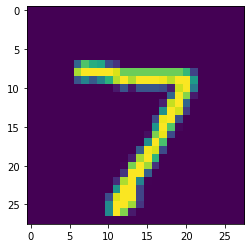

In [6]:
# Test data is the same format.
plt.imshow(mnist_test_data[0][0][0])

In [7]:
# CB: Define Network, modifying previous Udacity example code.
# CB: Notice the logic junctions in layer initialization.
# CB: For now, Batch Norm booleans are same for each layer.  This could be modified if curious.
class NeuralNetBNTest(nn.Module):
    def __init__(self, batch_norm_before=False, batch_norm_after=False, input_size=784, hidden_dim=128, output_size=10):
        """
        Init method.
        
        Creates a PyTorch net for testing Batch Normalization before and after activations.  
        
        Before and after Batch Normalizations are boolean parameters, currently the same for each layer.
        
        Initialized for MNIST data.
        
        :param batch_norm_before: bool
            Pass True to create a network that uses batch normalization before activation; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        
        :param batch_norm_after: bool
            Pass True to create a network that uses batch normalization after activation; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        """
        super(NeuralNetBNTest, self).__init__() # init super
        
        # CB: Initialize to given parameters (defaults to MNIST).
        # CB: input_size defaults to images of size (28,28) = 28*28 = 784 unrolled layer size.
        self.input_size = input_size 
        self.hidden_dim = hidden_dim
        
        # CB: output_size defaults to 10 MNIST classes.
        self.output_size = output_size 
        
        # CB: Both BN options default to False.
        self.batch_norm_before = batch_norm_before
        self.batch_norm_after = batch_norm_after
        
        # CB: First logic junction where first batch norm layer created.
        # CB: Hidden layer created with bias=False.
        # CB: Otherwise, create regular hidden layer with bias.
        if batch_norm_before or batch_norm_after:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)
            
        # CB: Same logic for second layer.
        if batch_norm_before or batch_norm_after:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # CB: Final classification layer.
        self.fc3 = nn.Linear(hidden_dim, output_size)
        
    
    
    def forward(self, x):
        """
        Forward method.  
        
        Batch Norm boolean logic is the same for each layer.  
        
        Could be modified in the future.
        """
        # CB: Unroll or flatten image.
        x = x.view(-1, 28*28)
        
        # CB: Follow the path determined by batch norm boolean logic.
        # CB: Batch Norm can occur before activation, after, or both.
        x = self.fc1(x)
        if self.batch_norm_before:
            x = self.batch_norm1(x)
        x = F.relu(x)
        if self.batch_norm_after:
            x = self.batch_norm1(x)
            
        # CB: Same for the second layer.
        x = self.fc2(x)
        if self.batch_norm_before:
            x = self.batch_norm2(x)
        x = F.relu(x)
        if self.batch_norm_after:
            x = self.batch_norm2(x)
            
        # CB: Final layer.
        x = self.fc3(x)
        
        return x

In [8]:
# CB: Define all combinations of Batch Norm booleans.

batchnorm_before_net = NeuralNetBNTest(batch_norm_before=True, batch_norm_after=False)
batchnorm_after_net = NeuralNetBNTest(batch_norm_before=False, batch_norm_after=True)
batchnorm_both_net = NeuralNetBNTest(batch_norm_before=True, batch_norm_after=True)
batchnorm_none_net = NeuralNetBNTest(batch_norm_before=False, batch_norm_after=False)

# CB: Show to confirm.
print(batchnorm_before_net)
print()
print(batchnorm_after_net)
print()
print(batchnorm_both_net)
print()
print(batchnorm_none_net)

NeuralNetBNTest(
  (fc1): Linear(in_features=784, out_features=256, bias=False)
  (batch_norm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=False)
  (batch_norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

NeuralNetBNTest(
  (fc1): Linear(in_features=784, out_features=256, bias=False)
  (batch_norm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=False)
  (batch_norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

NeuralNetBNTest(
  (fc1): Linear(in_features=784, out_features=256, bias=False)
  (batch_norm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(

In [9]:
# CB: Create loaders.

workers = 0
batch = 64

train_loader = torch.utils.data.DataLoader(mnist_train_data, batch_size=batch,
                                           num_workers=workers)

test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=batch,
                                          num_workers=workers)

In [10]:
# CB: Train function.

def train(model, n_epochs=5):
    
    """
    Train function.
    
    :param n_epochs: int
    Number of epochs to train.
    """

    # CB: List to keep track of losses.
    losses = []
        
    # CB: Cross entropy loss function.
    loss_function = nn.CrossEntropyLoss()

    # CB: Stochastic Gradient Descent optimizer with learning rate 0.01.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # CB: Call network object's inherited train method.
    model.train()
    
    for epoch in range(1, n_epochs+1):
        
        train_loss = 0.0
        
        # CB: Train the model.
        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            
            # CB: Clear gradients.
            optimizer.zero_grad()
            
            # CB: Pass data through model.
            output = model(data)
            
            # CB: Compute loss.
            loss = loss_function(output, target)
            
            # CB: Compute gradient.
            loss.backward()

            # CB: Update params by stepping in direction of negative gradient.
            optimizer.step()
            
            train_loss += loss.item() 
            batch_count +=1                

        # CB: Append to list of training losses.
        losses.append(train_loss/batch_count)
        
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, 
            train_loss/batch_count))
    
    # CB: Return list of losses for plotting.
    return losses

In [11]:
%%time

losses_no_BN = train(batchnorm_none_net)

Epoch: 1 	Training Loss: 1.648761
Epoch: 2 	Training Loss: 0.528420
Epoch: 3 	Training Loss: 0.388793
Epoch: 4 	Training Loss: 0.340481
Epoch: 5 	Training Loss: 0.310928
CPU times: user 2min 32s, sys: 4.69 s, total: 2min 37s
Wall time: 1min 11s


In [12]:
%%time

losses_BN_before = train(batchnorm_before_net)

Epoch: 1 	Training Loss: 0.449058
Epoch: 2 	Training Loss: 0.183904
Epoch: 3 	Training Loss: 0.128750
Epoch: 4 	Training Loss: 0.097379
Epoch: 5 	Training Loss: 0.076562
CPU times: user 4min 7s, sys: 5.73 s, total: 4min 13s
Wall time: 1min 39s


In [13]:
%%time

losses_BN_after = train(batchnorm_after_net)

Epoch: 1 	Training Loss: 0.328245
Epoch: 2 	Training Loss: 0.136339
Epoch: 3 	Training Loss: 0.091483
Epoch: 4 	Training Loss: 0.066847
Epoch: 5 	Training Loss: 0.049992
CPU times: user 4min 6s, sys: 4.14 s, total: 4min 10s
Wall time: 1min 31s


In [14]:
%%time

losses_BN_both = train(batchnorm_both_net)

Epoch: 1 	Training Loss: 0.334962
Epoch: 2 	Training Loss: 0.142131
Epoch: 3 	Training Loss: 0.097509
Epoch: 4 	Training Loss: 0.071404
Epoch: 5 	Training Loss: 0.053606
CPU times: user 5min 22s, sys: 4.92 s, total: 5min 27s
Wall time: 1min 53s


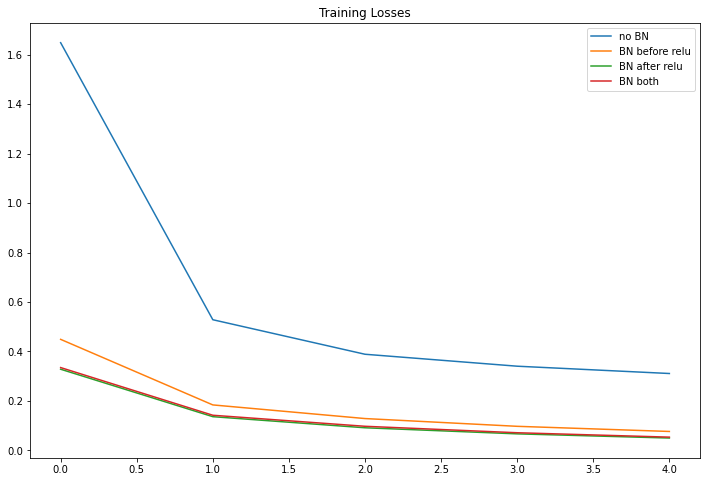

In [15]:
# CB: Compare different model losses over epochs.

fig, ax = plt.subplots(figsize=(12,8))

plt.plot(losses_no_BN, label='no BN', alpha=1.0)
plt.plot(losses_BN_before, label='BN before relu', alpha=1.0)
plt.plot(losses_BN_after, label='BN after relu', alpha=1.0)
plt.plot(losses_BN_both, label = 'BN both', alpha=1.0)
plt.title("Training Losses")
plt.legend()

In [16]:
# CB: Test function.

def test(model, train=False):
    """
    Function to test models.
    
    :param train: bool
    Defaults to False.  Affects statistics in evaluation.
    
    """
    
    # CB: Initialize for accuracy calculations.
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # CB: Call appropriate inherited network methods for evaluation mode.
    if(train==True):
        model.train()
    if(train==False):
        model.eval()
    
    loss_function = nn.CrossEntropyLoss()
    
    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)

        output = model(data)

        loss = loss_function(output, target)

        test_loss += loss.item()*batch_size

        _, pred = torch.max(output, 1)

        correct = np.squeeze(pred.eq(target.data.view_as(pred)))

        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [17]:
print('testing no batch norm net, train = False')
test(batchnorm_none_net)
print('testing no batch norm net, train = True')
test(batchnorm_none_net, train=True)

testing no batch norm net, train = False
Test Loss: 0.289695

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 87% (900/1032)
Test Accuracy of     3: 89% (900/1010)
Test Accuracy of     4: 91% (901/982)
Test Accuracy of     5: 87% (784/892)
Test Accuracy of     6: 93% (899/958)
Test Accuracy of     7: 90% (928/1028)
Test Accuracy of     8: 87% (850/974)
Test Accuracy of     9: 91% (920/1009)

Test Accuracy (Overall): 91% (9154/10000)
testing no batch norm net, train = True
Test Loss: 0.289695

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 87% (900/1032)
Test Accuracy of     3: 89% (900/1010)
Test Accuracy of     4: 91% (901/982)
Test Accuracy of     5: 87% (784/892)
Test Accuracy of     6: 93% (899/958)
Test Accuracy of     7: 90% (928/1028)
Test Accuracy of     8: 87% (850/974)
Test Accuracy of     9: 91% (920/1009)

Test Accuracy (Overall): 91% (9154/10000)


In [18]:
print('testing batch norm before net, train = False')
test(batchnorm_before_net)
print('testing batch norm before net, train = True')
test(batchnorm_before_net, train=True)

testing batch norm before net, train = False
Test Loss: 0.089578

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 96% (1001/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 96% (946/982)
Test Accuracy of     5: 97% (869/892)
Test Accuracy of     6: 95% (919/958)
Test Accuracy of     7: 96% (991/1028)
Test Accuracy of     8: 96% (938/974)
Test Accuracy of     9: 97% (979/1009)

Test Accuracy (Overall): 97% (9727/10000)
testing batch norm before net, train = True
Test Loss: 0.102587

Test Accuracy of     0: 98% (965/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 96% (1001/1032)
Test Accuracy of     3: 97% (981/1010)
Test Accuracy of     4: 96% (949/982)
Test Accuracy of     5: 96% (862/892)
Test Accuracy of     6: 96% (924/958)
Test Accuracy of     7: 96% (995/1028)
Test Accuracy of     8: 95% (934/974)
Test Accuracy of     9: 94% (956/1009)

Test Accuracy (Overall): 96% (9693/10000)


In [19]:
print('testing batch norm after net, train = False')
test(batchnorm_after_net)
print('testing batch norm after net, train = True')
test(batchnorm_after_net, train=True)

testing batch norm after net, train = False
Test Loss: 0.081670

Test Accuracy of     0: 98% (966/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 96% (1001/1032)
Test Accuracy of     3: 97% (984/1010)
Test Accuracy of     4: 97% (954/982)
Test Accuracy of     5: 97% (870/892)
Test Accuracy of     6: 96% (922/958)
Test Accuracy of     7: 96% (988/1028)
Test Accuracy of     8: 96% (943/974)
Test Accuracy of     9: 97% (983/1009)

Test Accuracy (Overall): 97% (9736/10000)
testing batch norm after net, train = True
Test Loss: 0.095222

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 98% (1120/1135)
Test Accuracy of     2: 97% (1003/1032)
Test Accuracy of     3: 96% (976/1010)
Test Accuracy of     4: 97% (953/982)
Test Accuracy of     5: 95% (855/892)
Test Accuracy of     6: 96% (925/958)
Test Accuracy of     7: 96% (992/1028)
Test Accuracy of     8: 97% (952/974)
Test Accuracy of     9: 95% (966/1009)

Test Accuracy (Overall): 97% (9711/10000)


In [20]:
print('testing batch norm both net, train = False')
test(batchnorm_both_net)
print('testing batch norm both net, train = True')
test(batchnorm_both_net, train=True)

testing batch norm both net, train = False
Test Loss: 2.107645

Test Accuracy of     0: 29% (291/980)
Test Accuracy of     1:  0% ( 0/1135)
Test Accuracy of     2:  1% (13/1032)
Test Accuracy of     3: 50% (512/1010)
Test Accuracy of     4: 31% (312/982)
Test Accuracy of     5:  2% (19/892)
Test Accuracy of     6: 13% (131/958)
Test Accuracy of     7:  0% ( 4/1028)
Test Accuracy of     8: 99% (972/974)
Test Accuracy of     9: 68% (693/1009)

Test Accuracy (Overall): 29% (2947/10000)
testing batch norm both net, train = True
Test Loss: 0.094237

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 96% (998/1032)
Test Accuracy of     3: 97% (988/1010)
Test Accuracy of     4: 96% (946/982)
Test Accuracy of     5: 96% (864/892)
Test Accuracy of     6: 96% (925/958)
Test Accuracy of     7: 96% (992/1028)
Test Accuracy of     8: 97% (946/974)
Test Accuracy of     9: 95% (968/1009)

Test Accuracy (Overall): 97% (9721/10000)
